**<---CODE FOR  RESTAURANT  REVIEW  SENTIMENT ANALYSIS--->**

**Library Imports**


---


This section begins by importing the necessary Python libraries for data manipulation and analysis. pandas and numpy are commonly used libraries for handling data in tabular formats and performing numerical operations, respectively.


---



In [ ]:
import pandas as pd
import numpy as np


**Data Loading**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ibminternshipproect/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)  # encoding="latin"

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Positive Sentiment Word Cloud Visualization**


---


This section showcases a word cloud visualization generated from positive sentiment restaurant reviews. The word cloud visually represents the most frequently occurring words in positive reviews, with larger words indicating higher frequency.


---



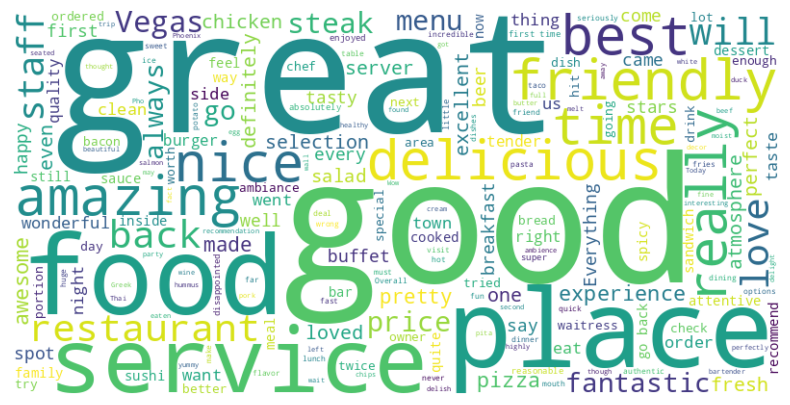

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud=data.loc[data['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])

wordcloud=WordCloud(width=800, height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [ ]:
data["Liked"].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

Data Preprocessing


**NLP Library Imports and Setup**

Importing the necessary Natural Language Processing (NLP) libraries and setting up tools for text data preprocessing

In [ ]:
#Importing essential libraries for performing NLP on 'Restaurant_reviews' dataset

import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stopwords List**

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Punctuation Symbols**

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

**Text Processing Function**

Removes punctuation symbols from the input text.

Converts the text to lowercase for uniformity.

Eliminates common English stopwords.

Tokenizes the cleaned text, splitting it into words.

In [ ]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


**Text Data Tokenization and DataFrame Update**

In [ ]:
data['tokenized_Review']=data['Review'].apply(text_process)
data.head()

,Review,Liked,tokenized_Review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


**Text Data Preprocessing and Corpus Creation**


---



In this section, text data preprocessing steps are described. The code snippet cleans and prepares the text data for analysis by:

1. Removing non-alphabetical characters.
2. Converting text to lowercase.
3. Tokenizing reviews into words.
4. Removing common English stopwords.
5. Applying stemming using the Porter Stemmer algorithm.
6. Creating a corpus of processed reviews for further analysis.


---



In [ ]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])
  review=review.lower()
  review_words = review.split()
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)
  corpus.append(review)



**Processed Text Data Sample (First 1500 Entries)**

In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

**Model Training and Evaluation**


---


**In this code snippet:**

Text data is converted into numerical features using Count Vectorization with a

maximum of 1500 features.

The data is split into training and testing sets (80% training, 20% testing).

A Multinomial Naive Bayes classifier is initialized and trained on the training data.

Predictions are made on the test data using the trained classifier.

Accuracy, precision, and recall scores are calculated to evaluate the model's performance.


---





In [ ]:
#creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)
print("------Scores-----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

------Scores-----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


**Confusion Matrix Visualization and Analysis**

Confusion matrix: [[72 25]
 [22 81]]


Text(95.72222222222221, 0.5, 'Actual values')

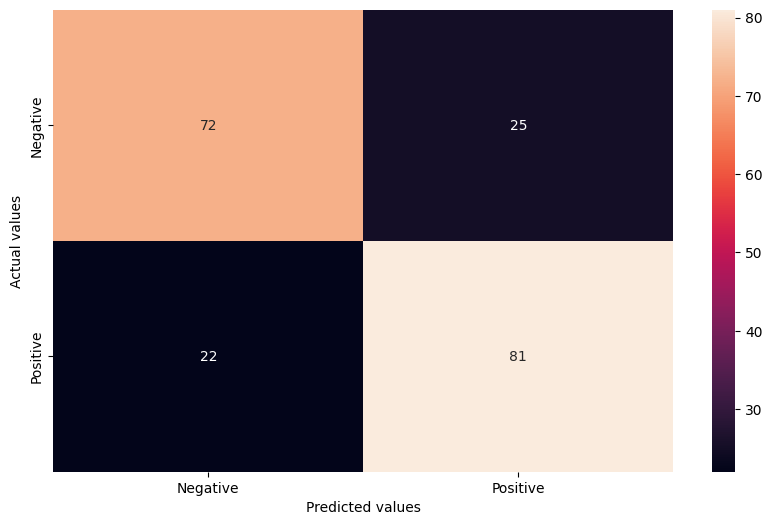

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix:',cm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**USING DIFFERENT MODELS FOR ACCURACY SCORE:**

**1. Hyperparameter Tuning for Naive Bayes Classifier**

In [ ]:
#Hyperparameter tuning the Naive Bayes Classifier

best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier=MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred=temp_classifier.predict(X_test)
  score=accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha is {}%".format(round(best_accuracy*100,2), round(alpha_val,1)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print("------------------------------------------")
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2), round(alpha_val,1)))

Accuracy score for alpha is 0.0%
Accuracy score for alpha is 78.0%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
Accuracy score for alpha is 78.5%
------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


  **2. Random Forest Classifier Implementation and Accuracy Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Calculate and print accuracy
rf_score = accuracy_score(y_test, rf_y_pred)
print("Accuracy score Using Random Forest: {}%".format(round(rf_score * 100, 2)))


Accuracy score Using Random Forest: 70.0%


**3. Support Vector Machine (SVM) Classifier Implementation and Accuracy Evaluation**

In [ ]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

# Calculate and print accuracy
svm_score = accuracy_score(y_test, svm_y_pred)
print("Accuracy score for SVM: {}%".format(round(svm_score * 100, 2)))

Accuracy score for SVM: 72.0%


**4. Gradient Boosting Classifier Implementation and Accuracy Evaluation**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_classifier.fit(X_train, y_train)
gb_y_pred = gb_classifier.predict(X_test)

# Calculate and print accuracy
gb_score = accuracy_score(y_test, gb_y_pred)
print("Accuracy score for Gradient Boosting: {}%".format(round(gb_score * 100, 2)))


Accuracy score for Gradient Boosting: 74.0%


**5. XGBoost Classifier Implementation and Accuracy Evaluation**

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Calculate and print accuracy
xgb_score = accuracy_score(y_test, xgb_y_pred)
print("Accuracy score for XGBoost: {}%".format(round(xgb_score * 100, 2)))


Accuracy score for XGBoost: 72.5%


**6. Logistic Regression Classifier Implementation and Accuracy Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

# Calculate and print accuracy
lr_score = accuracy_score(y_test, lr_y_pred)
print("Accuracy score for Logistic Regression: {}%".format(round(lr_score * 100, 2)))



Accuracy score for Logistic Regression: 71.0%


**Sentiment Prediction Using the Trained Model**

This section demonstrates how the sentiment analysis model is utilized to predict sentiment labels for sample restaurant reviews.

In [ ]:
def predict_sentiment(sample_review):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
  sample_review=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words= [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review=[ps.stem(word) for word in sample_review_words]
  final_review=' '.join(final_review)
  temp=cv.transform([final_review]).toarray()
  return classifier.predict(temp)

**Five sample reviews are provided, and the model predicts whether each review is positive or negative.**

In [ ]:
# Predicting values
#1.
sample_review='Not tasty and the texture was just nasty'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#2.
sample_review='Food was pretty absolutely wonderful, from preparation to presentation, very pleasing.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#3.
sample_review='Food was pretty bad and the service was very late.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')
#4.
sample_review='Food was pretty absolutely wonderful.'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

#5.
sample_review='food delici spici enough sure ask spicier prefer way'
if  predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
This is a POSITIVE review.
This is a NEGATIVE review!
This is a POSITIVE review.
This is a POSITIVE review.
